In [2]:
from google.colab import files
uploaded=files.upload()

Saving laptop.csv to laptop.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(next(iter(uploaded)))

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
df.drop(columns=['Unnamed: 0.1'], inplace=True, errors='ignore')
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


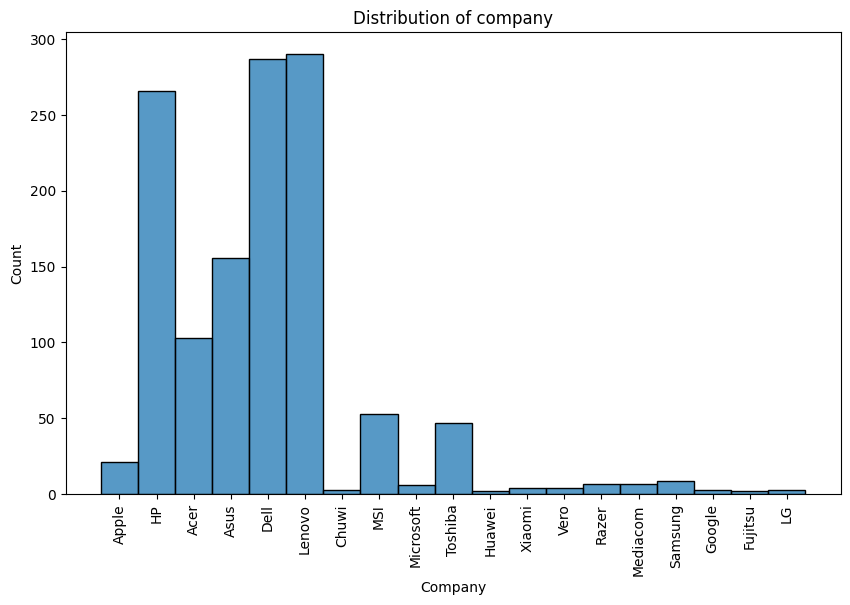

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Company'])
plt.title("Distribution of company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()


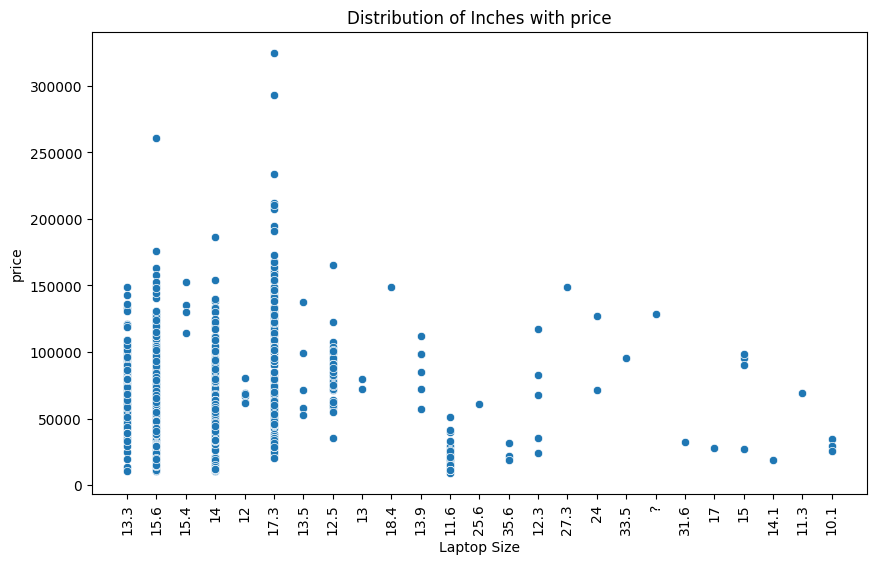

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.title("Distribution of Inches with price")
plt.xlabel("Laptop Size")
plt.ylabel("price")
plt.xticks(rotation='vertical')
plt.show()


In [15]:
df['Inches']=df['Inches'].replace('?',np.nan)

In [16]:
df['Inches']=df['Inches'].astype('float64')

In [17]:
df['Weight'] = df['Weight'].replace('?', np.nan)

In [18]:
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [19]:
df['Ram']=df['Ram'].str.replace('GB','')

In [20]:
df['Ram']=df['Ram'].dropna().astype(int)

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


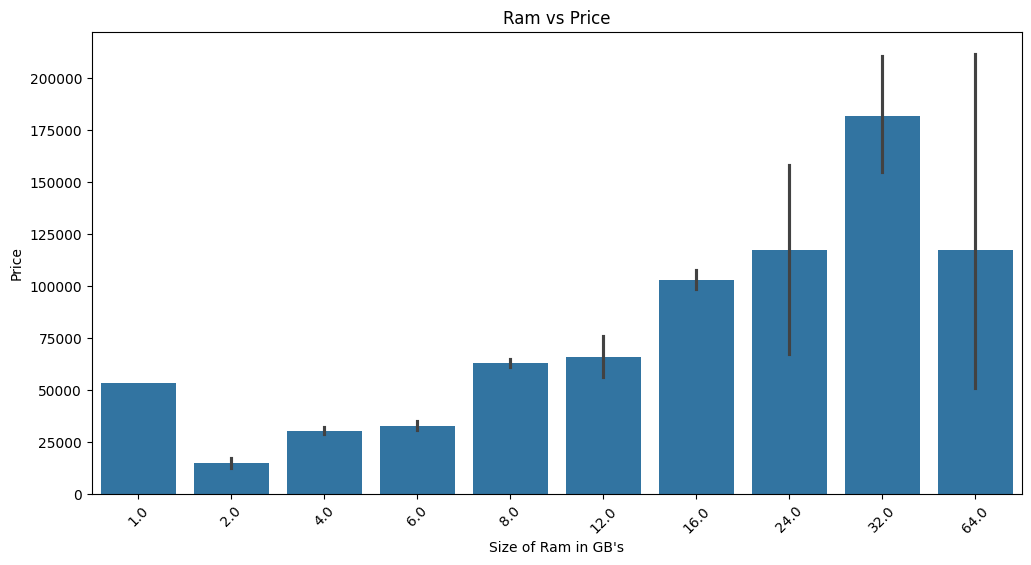

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='Ram', y='Price', data=df)
plt.title("Ram vs Price")
plt.xlabel("Size of Ram in GB's")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


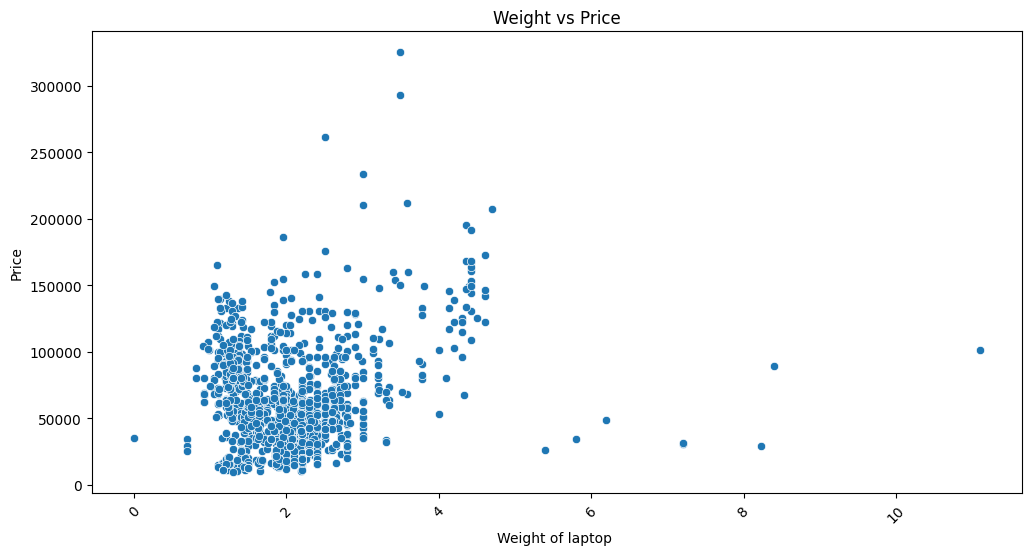

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Weight', y='Price', data=df)
plt.title("Weight vs Price")
plt.xlabel("Weight of laptop ")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   float64
 3   ScreenResolution  1271 non-null   object 
 4   Cpu               1271 non-null   object 
 5   Ram               1271 non-null   float64
 6   Memory            1271 non-null   object 
 7   Gpu               1271 non-null   object 
 8   OpSys             1271 non-null   object 
 9   Weight            1271 non-null   float64
 10  Price             1271 non-null   float64
dtypes: float64(4), object(7)
memory usage: 119.2+ KB


In [30]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in str(x) else 0)
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in str(x) else 0)


In [31]:
df['ScreenResolution']=df['ScreenResolution'].str.split(" ").apply(lambda x:x[-1])

In [32]:
df['Screen width']=df.ScreenResolution.str.split("x").str[0]
df['Screen height']=df.ScreenResolution.str.split("x").str[1]


In [33]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [34]:
df['PPI']=((df['Screen width'].astype(int)**2)+(df['Screen height'].astype(int)**2))**0.5/df['Inches'].astype('float')

In [35]:
df.drop(columns=['Screen width'], inplace = True)
df.drop(columns=['Screen height'], inplace = True)


In [36]:
df['Cpu'].str.split(" ")
df["Cpu Name"]=df.Cpu.apply(lambda x:x.split()[0:3])

In [37]:
df['Cpu brand']=df['Cpu Name'].apply(lambda x: ' '.join(x))

In [38]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'AMD':
            return 'AMD Processor'
        else:
            return 'Other Intel Processor'

<Axes: xlabel='Cpu brand'>

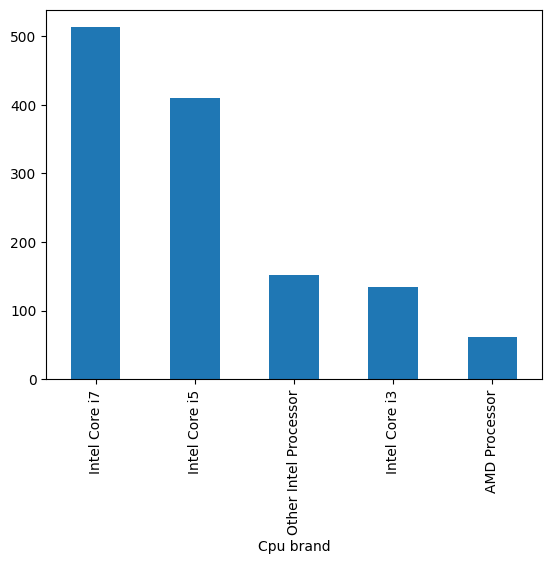

In [39]:
df['Cpu brand']=df['Cpu brand'].apply(fetch_processor)
df['Cpu brand'].value_counts().plot(kind='bar')

In [40]:
df.drop(columns=['Cpu Name','Cpu'], inplace=True)

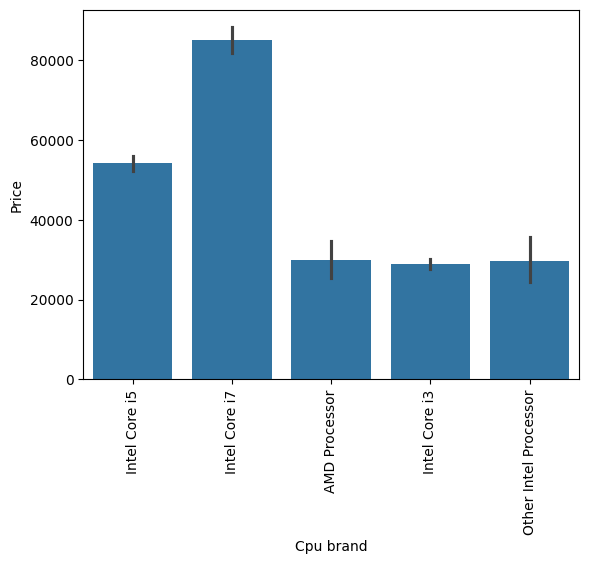

In [41]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
df['Memory Amount']=df.Memory.str.split(" ").apply(lambda x:x[0])
df['Memory Type']=df.Memory.str.split(" ").apply(lambda x:x[-1])

In [43]:
def turn_memory_into_MB(value):
  if "GB" in value:
    return float(value[:value.find("GB")])*1000
  elif "TB" in value:
      return float(value[:value.find("TB")])*1000*1000


In [44]:
df['Memory Amount']=df['Memory Amount'].apply(turn_memory_into_MB)

In [45]:
df.isnull().sum()



,0
Company,0
TypeName,0
Inches,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0
Price,0
IPS,0


In [46]:
df['Memory Amount']=df['Memory Amount'].fillna(df['Memory Amount'].mean())

In [47]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0
Price,0
IPS,0


In [48]:
df.drop(columns=['Memory'], inplace=True)

In [49]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,65
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [50]:
df["Gpu brand"]=df['Gpu'].apply(lambda x:x.split()[0])

In [34]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,702
Nvidia,392
AMD,176
ARM,1


In [51]:
df=df[df['Gpu brand']!="ARM"]

In [52]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,702
Nvidia,392
AMD,176


In [53]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1045
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


In [54]:
def clean_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return "Others/No OS/Linux"

In [55]:
df['OpSys']=df['OpSys'].apply(clean_os)

<ipython-input-55-8cec2b7ea1c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys']=df['OpSys'].apply(clean_os)


In [56]:
df.drop(columns=['Gpu'], inplace=True)

<ipython-input-56-02e14c40d970>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace=True)


In [58]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OpSys,0
Weight,0
Price,0
IPS,0
TouchScreen,0
PPI,0


In [59]:
df


,Company,TypeName,Inches,Ram,OpSys,Weight,Price,IPS,TouchScreen,PPI,Cpu brand,Memory Amount,Memory Type,Gpu brand
0,Apple,Ultrabook,13.3,8.0,Mac,1.37,71378.6832,1,0,226.983005,Intel Core i5,128000.0,SSD,Intel
1,Apple,Ultrabook,13.3,8.0,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,128000.0,Storage,Intel
2,HP,Notebook,15.6,8.0,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,256000.0,SSD,Intel
3,Apple,Ultrabook,15.4,16.0,Mac,1.83,135195.3360,1,0,220.534624,Intel Core i7,512000.0,SSD,AMD
4,Apple,Ultrabook,13.3,8.0,Mac,1.37,96095.8080,1,0,226.983005,Intel Core i5,256000.0,SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4.0,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,128000.0,SSD,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16.0,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,512000.0,SSD,Intel
1300,Lenovo,Notebook,14.0,2.0,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64000.0,Storage,Intel
1301,HP,Notebook,15.6,6.0,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000000.0,HDD,AMD


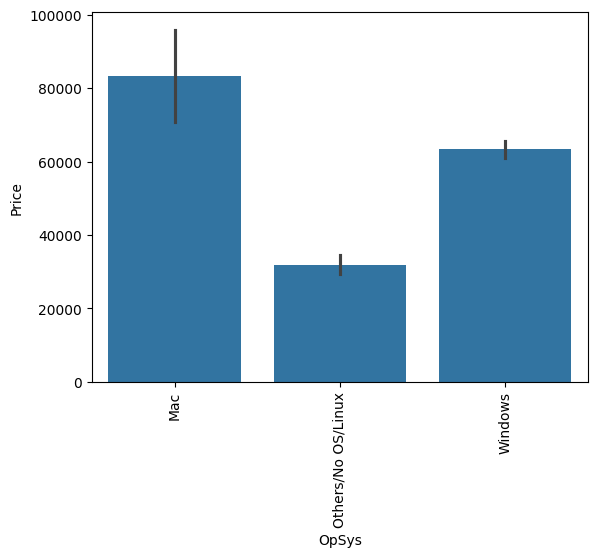

In [60]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

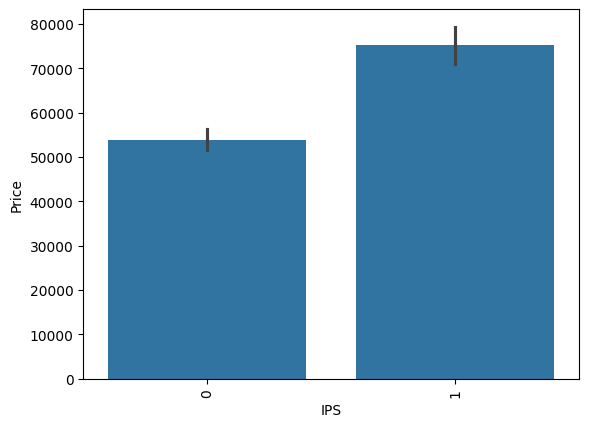

In [61]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

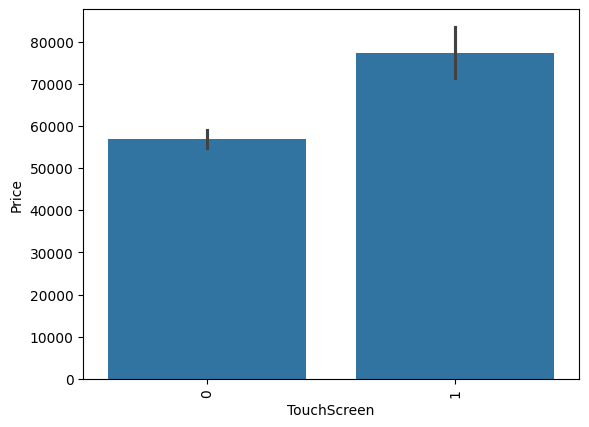

In [62]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

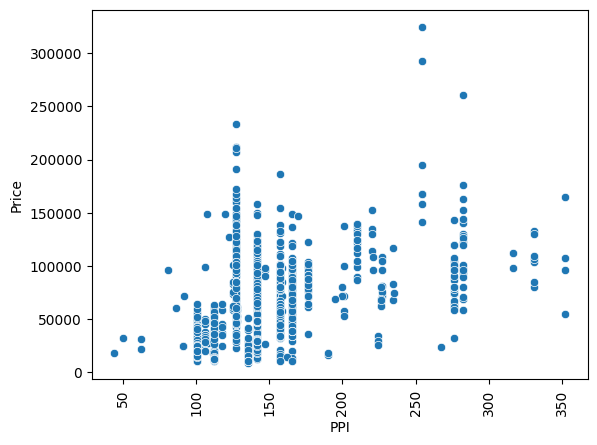

In [65]:
sns.scatterplot(x=df['PPI'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

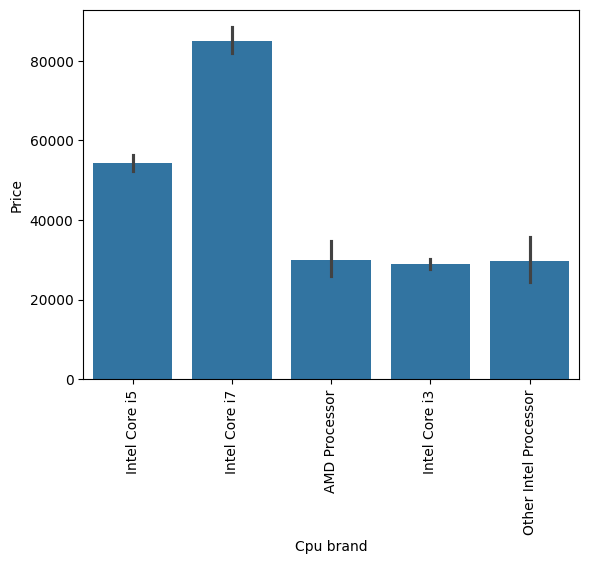

In [66]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

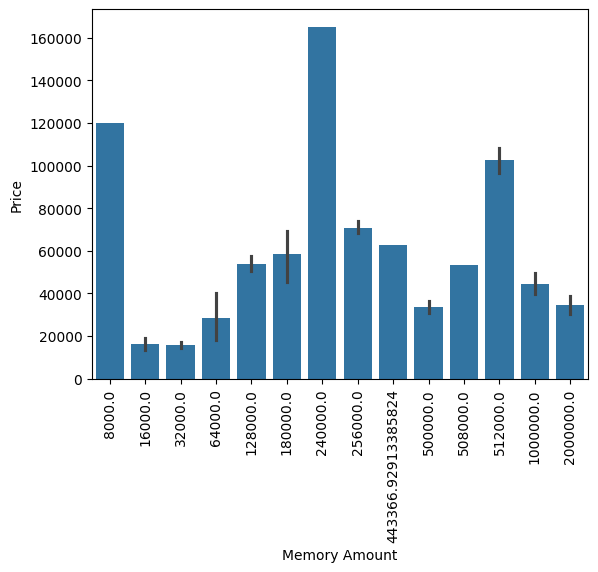

In [68]:
sns.barplot(x=df['Memory Amount'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

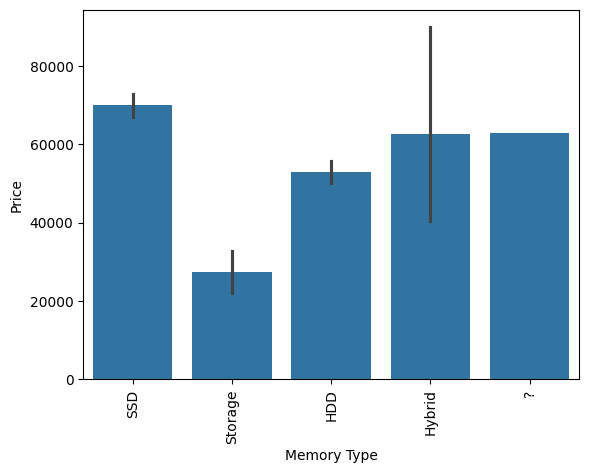

In [69]:
sns.barplot(x=df['Memory Type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [71]:
df['Memory Type'].isnull().sum()

np.int64(0)

In [72]:
df['Memory Type'].replace('?', np.nan, inplace=True)

<ipython-input-72-38563e804e03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Memory Type'].replace('?', np.nan, inplace=True)
<ipython-input-72-38563e804e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory Type'].replace('?', np.nan, inplace=True)


In [73]:
df['Memory Type']=df['Memory Type'].fillna(df['Memory Type'].mode()[0])

<ipython-input-73-39f0ec0461e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory Type']=df['Memory Type'].fillna(df['Memory Type'].mode()[0])


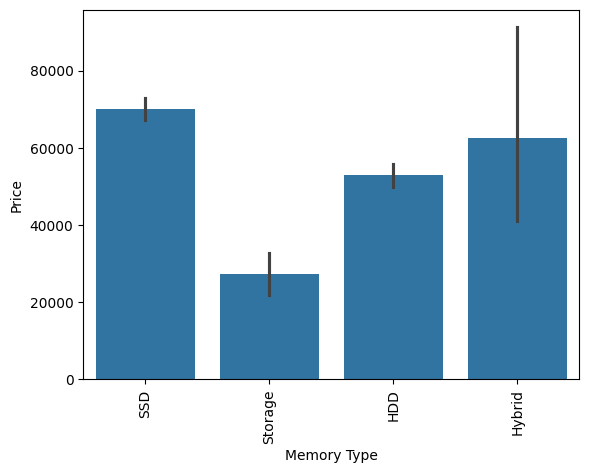

In [74]:
sns.barplot(x=df['Memory Type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

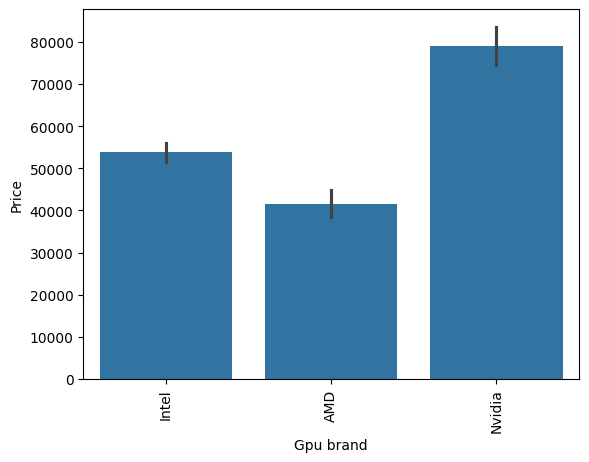

In [70]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

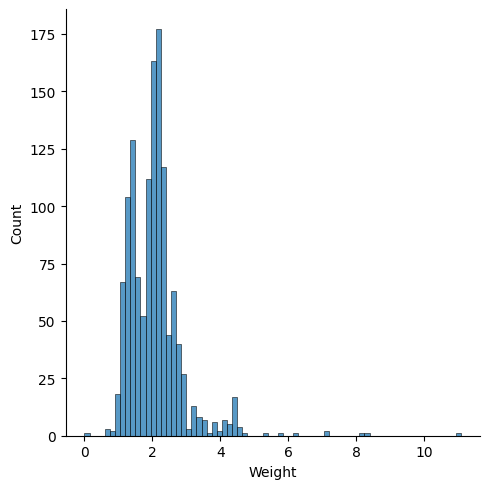

In [75]:
sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

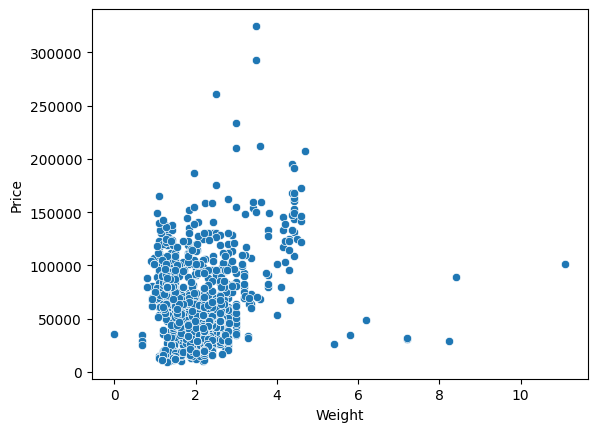

In [76]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [77]:
df.select_dtypes(include=['number']).corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.686639
PPI,0.471247
IPS,0.257557
TouchScreen,0.191775
Weight,0.176223
Inches,0.044328
Memory Amount,-0.125949


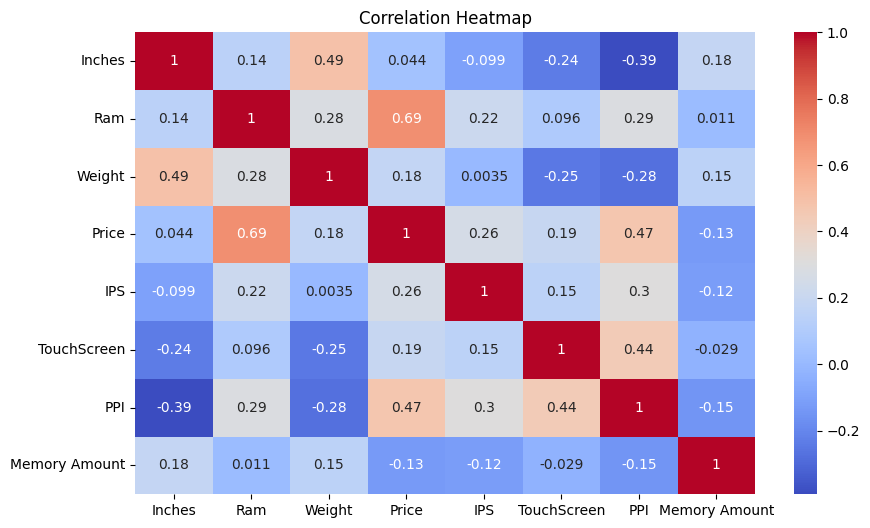

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-79-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

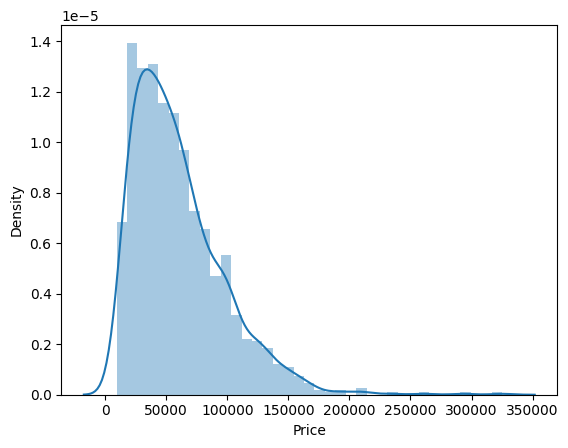

In [79]:
sns.distplot(df['Price'])

<ipython-input-80-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

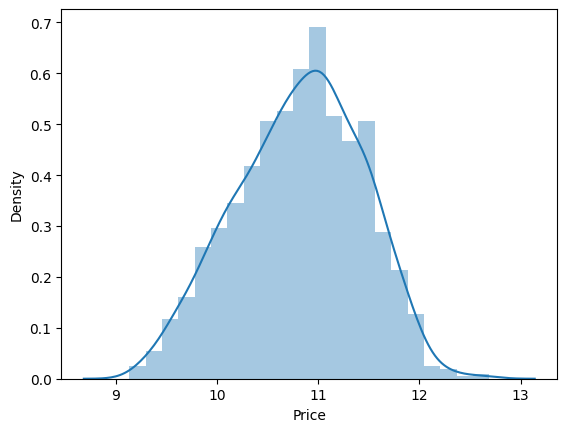

In [80]:
sns.distplot(np.log(df['Price']))

In [81]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OpSys,0
Weight,0
Price,0
IPS,0
TouchScreen,0
PPI,0


In [82]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [85]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [86]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7955836069145905
MAE 0.20190081480451247


In [87]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7818818903316
MAE 0.20870093870195913


In [88]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.786655842965894
MAE 0.20648723828621507


In [89]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7246296880975738
MAE 0.21078348190107998


In [90]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8454250030818289
MAE 0.17553800299733707


In [91]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8831325551702233
MAE 0.1535103240067994


In [92]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8871164845943899
MAE 0.14459060346858207


In [93]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 4, 9, 11, 12])
    ],
    remainder="passthrough"
)

step2 = XGBRegressor(n_estimators=1000,learning_rate=0.05,max_depth=5)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9021200167022692
MAE 0.1379501086720415


In [94]:
np.exp(0.13)

np.float64(1.1388283833246218)

#Exporting the model


In [95]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [96]:
x

,Company,TypeName,Inches,Ram,OpSys,Weight,IPS,TouchScreen,PPI,Cpu brand,Memory Amount,Memory Type,Gpu brand
0,Apple,Ultrabook,13.3,8.0,Mac,1.37,1,0,226.983005,Intel Core i5,128000.0,SSD,Intel
1,Apple,Ultrabook,13.3,8.0,Mac,1.34,0,0,127.677940,Intel Core i5,128000.0,Storage,Intel
2,HP,Notebook,15.6,8.0,Others/No OS/Linux,1.86,0,0,141.211998,Intel Core i5,256000.0,SSD,Intel
3,Apple,Ultrabook,15.4,16.0,Mac,1.83,1,0,220.534624,Intel Core i7,512000.0,SSD,AMD
4,Apple,Ultrabook,13.3,8.0,Mac,1.37,1,0,226.983005,Intel Core i5,256000.0,SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4.0,Windows,1.80,1,1,157.350512,Intel Core i7,128000.0,SSD,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16.0,Windows,1.30,1,1,276.053530,Intel Core i7,512000.0,SSD,Intel
1300,Lenovo,Notebook,14.0,2.0,Windows,1.50,0,0,111.935204,Other Intel Processor,64000.0,Storage,Intel
1301,HP,Notebook,15.6,6.0,Windows,2.19,0,0,100.454670,Intel Core i7,1000000.0,HDD,AMD
